Характеристики продаж видеоигр<br>
https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset/data?select=PS4_GamesSales.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(
    "games.csv",
    sep=','
)
df['Year'] = df['Year'].astype('category')

print(df.shape)
df.head()

(1034, 9)


,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


<h1>Описание полей</h1>
Game - название игры<br>
Year - год выпуска<br>
Genre - жанр<br>
Publisher - издатель<br>
North America - продали в Америке<br>
Europe - продажи в Европе<br>
Japan - продажи в Японии<br>
Rest of World - продажи в остальном мире<br>
Global - сумма продаж<br>

<h2>Сначала разберемся с целевым признаком - Global</h2>

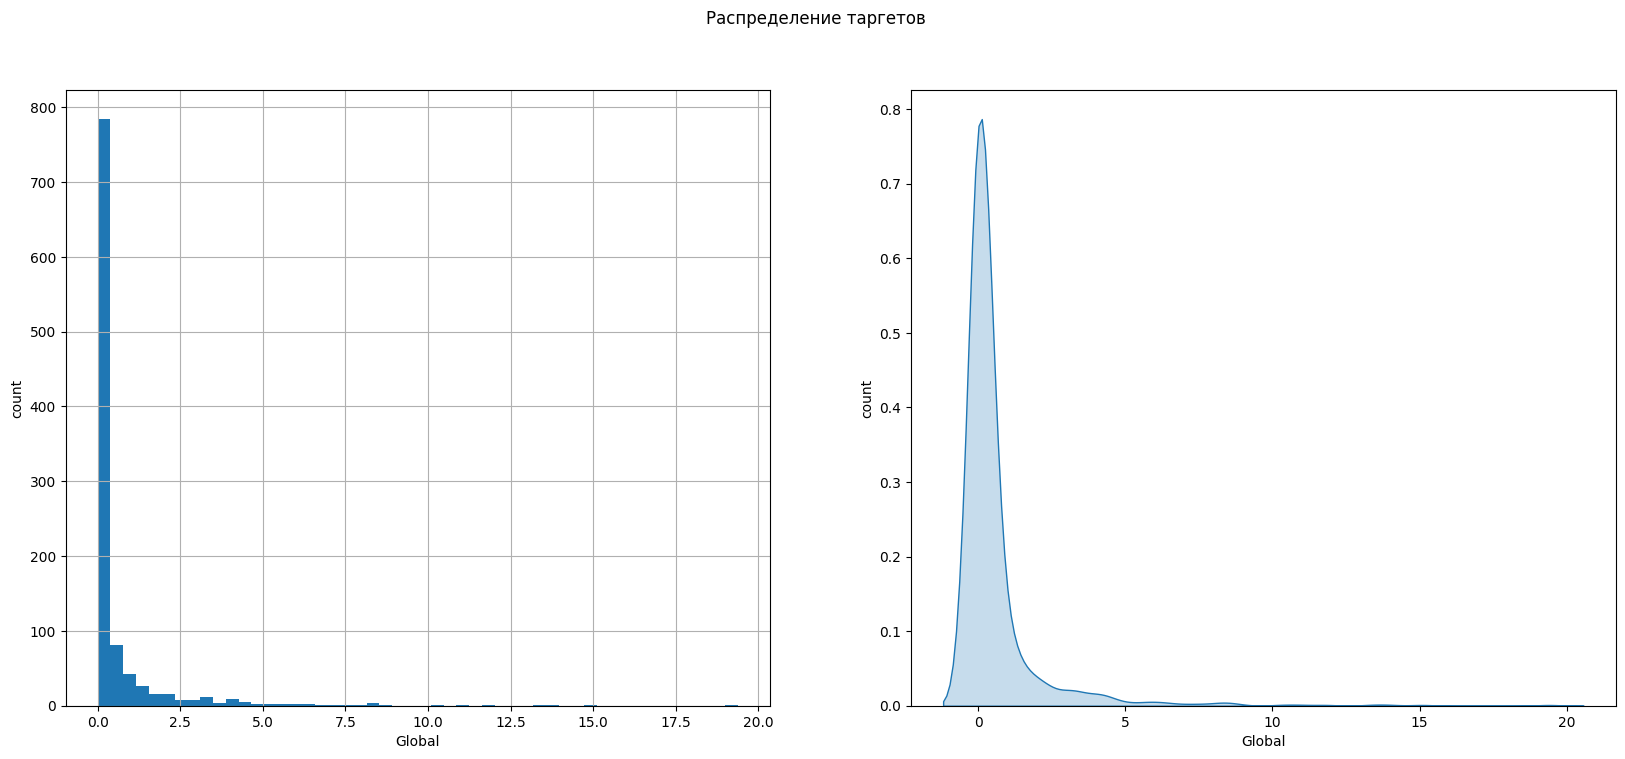

In [3]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
df['Global'].hist(density=False, bins=50)
plt.xlabel('Global')
plt.ylabel('count')

plt.subplot(122)
sns.kdeplot(df['Global'], shade=True)
plt.xlabel('Global')
plt.ylabel('count')

plt.suptitle('Распределение таргетов')
plt.show()

In [4]:
df['Global'].value_counts()

Global
0.00    322
0.02     39
0.04     39
0.03     38
0.01     34
       ... 
2.06      1
2.05      1
2.02      1
1.98      1
1.21      1
Name: count, Length: 206, dtype: int64

Видим большое количество игр, значение продаж у которых равно нулю. Возможно, - это выбросы

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Game           1034 non-null   object  
 1   Year           825 non-null    category
 2   Genre          1034 non-null   object  
 3   Publisher      825 non-null    object  
 4   North America  1034 non-null   float64 
 5   Europe         1034 non-null   float64 
 6   Japan          1034 non-null   float64 
 7   Rest of World  1034 non-null   float64 
 8   Global         1034 non-null   float64 
dtypes: category(1), float64(5), object(3)
memory usage: 66.1+ KB


Видим много значений,у которых пропущены значения для издателя, или года выпуска - убираем их из датафрейма, так как без них у нас практически нет фичей для анализа/моделирования

In [6]:
df = df[df['Year'].notna() | df['Publisher'].notna()]

Построим график снова

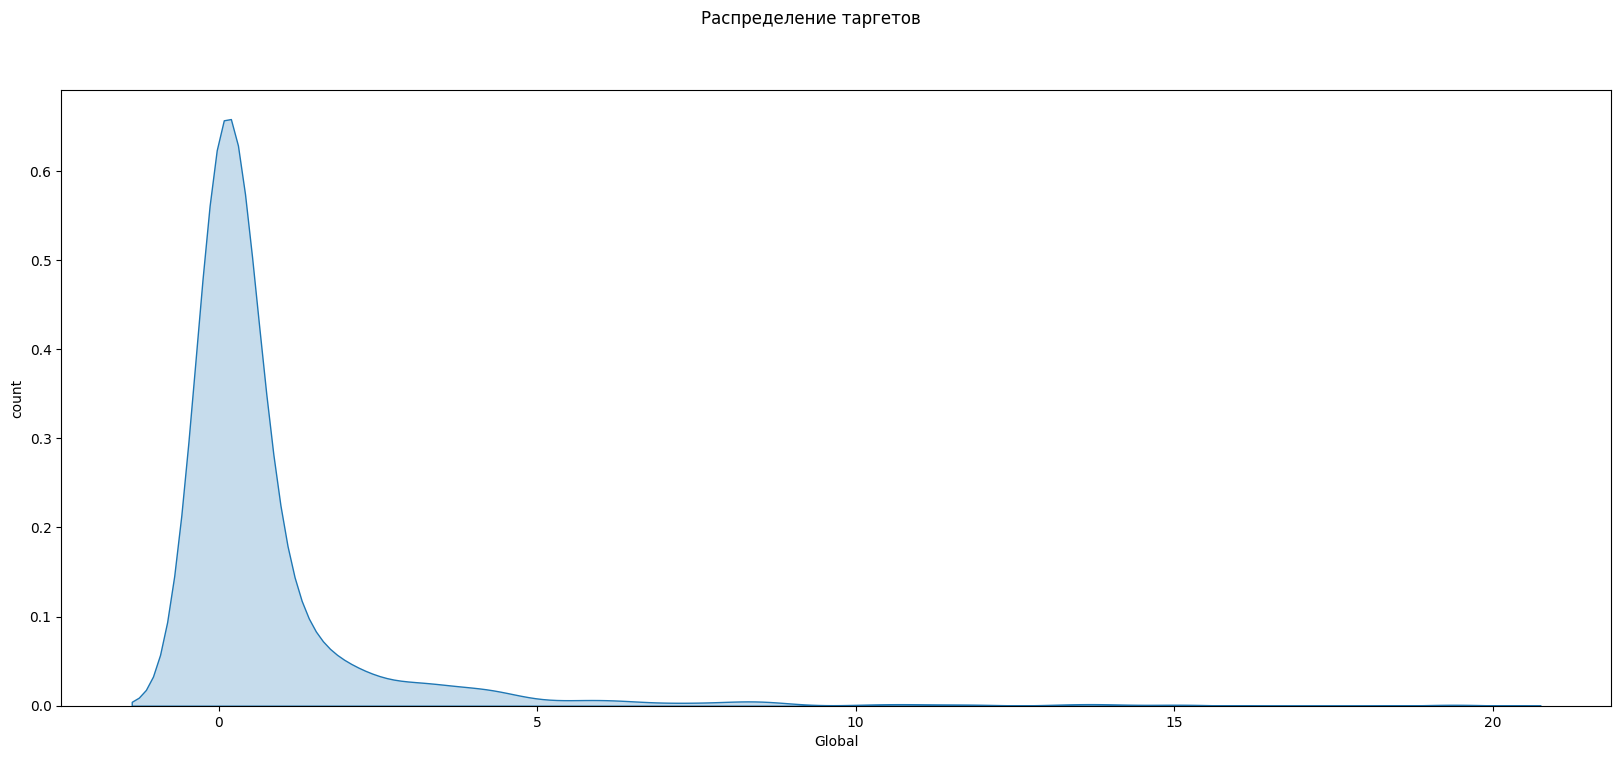

In [7]:
plt.figure(figsize=(20, 8))

sns.kdeplot(df['Global'], shade=True)
plt.xlabel('Global')
plt.ylabel('count')

plt.suptitle('Распределение таргетов')
plt.show()

И снова много нулей

In [8]:
df[df['Global'].eq(0)]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
712,Blood Bowl 2,2015.0,Sports,Focus Home Interactive,0.0,0.0,0.0,0.0,0.0
713,The Witness,2016.0,Misc,"Thekla, Inc.",0.0,0.0,0.0,0.0,0.0
714,Quantic Dream Collection,2015.0,Action,Sony Computer Entertainment,0.0,0.0,0.0,0.0,0.0
715,Iwaihime: Matsuri,2017.0,Adventure,Nippon Ichi Software,0.0,0.0,0.0,0.0,0.0
716,RepKiss,2017.0,Adventure,Entergram,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1025,Biomutant,2019.0,Action,THQ Nordic,0.0,0.0,0.0,0.0,0.0
1026,de Blob,2017.0,Platform,THQ Nordic,0.0,0.0,0.0,0.0,0.0
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.0,0.0,0.0,0.0,0.0
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.0,0.0,0.0,0.0,0.0


Оставим данные нули, так как, возможно, просто игры не имеют большой популярности по сравнению с другими. Но обязательно учтем этот момент далее.<br> Возможно, для данного набора данных использовали неподходящую нормировку, в ходе которой появилось большое количество нулей<br>

Теперь посмотрим признаки, начнем с количественных

In [9]:
df_num_feats = df.select_dtypes(['float', 'float64', 'float32', 'int'])
df_num_feats.head()

,North America,Europe,Japan,Rest of World,Global
0,6.06,9.71,0.60,3.02,19.39
1,6.18,6.05,0.41,2.44,15.09
2,5.26,6.21,0.21,2.26,13.94
3,4.67,6.21,0.40,2.12,13.40
4,1.27,8.64,0.15,1.73,11.80


Поле Global - сумма продаж из 4 столбцов. Создадим матрицу корелляций

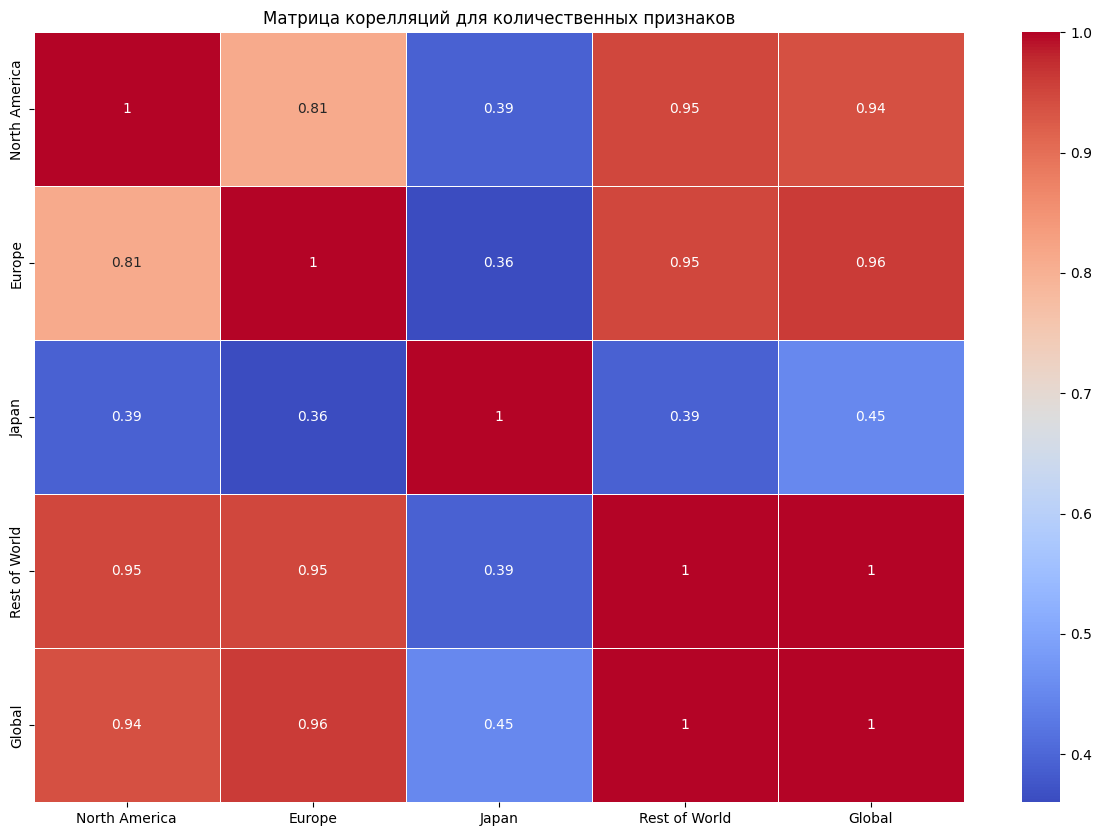

In [10]:
corr_matrix = df_num_feats.corr()
corr_matrix = round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица корелляций для количественных признаков')
plt.show()

У таргета прямая корелляция с продажами практически во всех странах (что было и так очевидно, конечно), кроме Японии

Ради интереса посмотрим графики

Text(0.5, 0.98, 'Распределение таргетов 4')

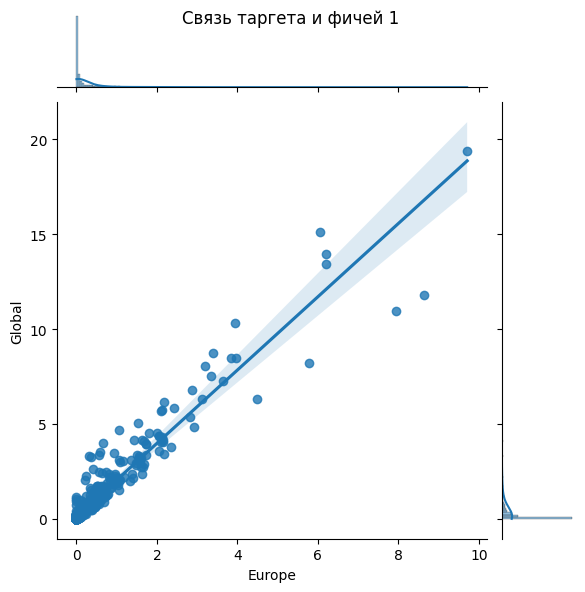

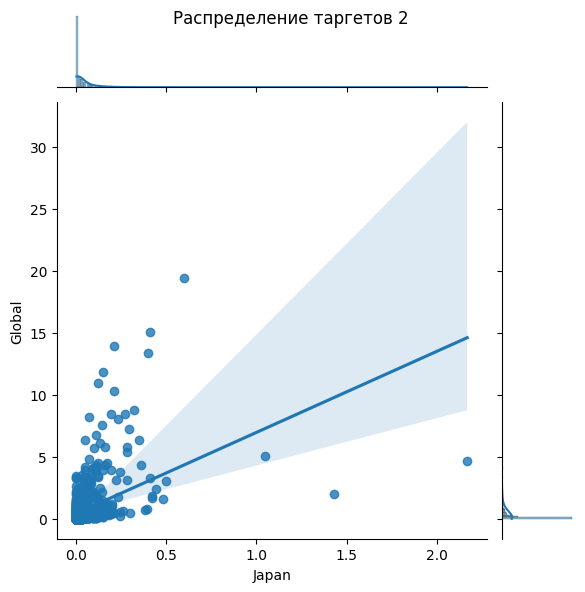

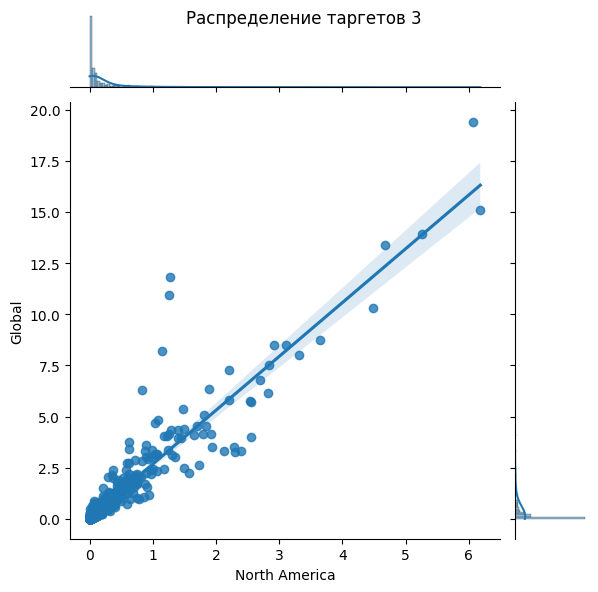

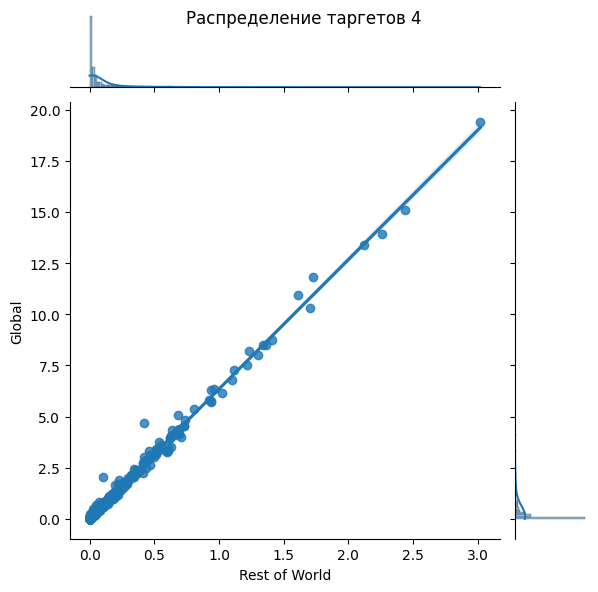

In [11]:
grid = sns.jointplot(x=df['Europe'], y=df['Global'], kind='reg')
plt.suptitle('Связь таргета и фичей 1')

grid2 = sns.jointplot(x=df['Japan'], y=df['Global'], kind='reg')
plt.suptitle('Распределение таргетов 2')

grid3 = sns.jointplot(x=df['North America'], y=df['Global'], kind='reg')
plt.suptitle('Распределение таргетов 3')

grid4 = sns.jointplot(x=df['Rest of World'], y=df['Global'], kind='reg')
plt.suptitle('Распределение таргетов 4')

Я бы взял для моделирования 1 общий признак для Америки, Европы и остального мира

<h1>Категориальные признаки</h1>

In [12]:
df_cat_feats = df.select_dtypes(['string', 'object', 'category'])
df_cat_feats = df_cat_feats.drop(columns=['Game'])
df_cat_feats

,Year,Genre,Publisher
0,2014.0,Action,Rockstar Games
1,2015.0,Shooter,Activision
2,2018.0,Action-Adventure,Rockstar Games
3,2017.0,Shooter,Activision
4,2017.0,Sports,EA Sports
...,...,...,...
1025,2019.0,Action,THQ Nordic
1026,2017.0,Platform,THQ Nordic
1027,2017.0,Adventure,Daedalic Entertainment
1028,2018.0,Action,Bandai Namco Entertainment


Посмотрим на жанры

In [13]:
df_genres = df_cat_feats['Genre']
df_genres.value_counts()

Genre
Action              205
Role-Playing        107
Shooter              75
Adventure            71
Sports               69
Misc                 55
Racing               48
Action-Adventure     38
Platform             33
Fighting             32
Strategy             25
Simulation           21
Music                18
Puzzle               10
MMO                   8
Visual Novel          8
Party                 2
Name: count, dtype: int64

Text(0.5, 1.0, 'Зависимость количества продаж от жанра игр')

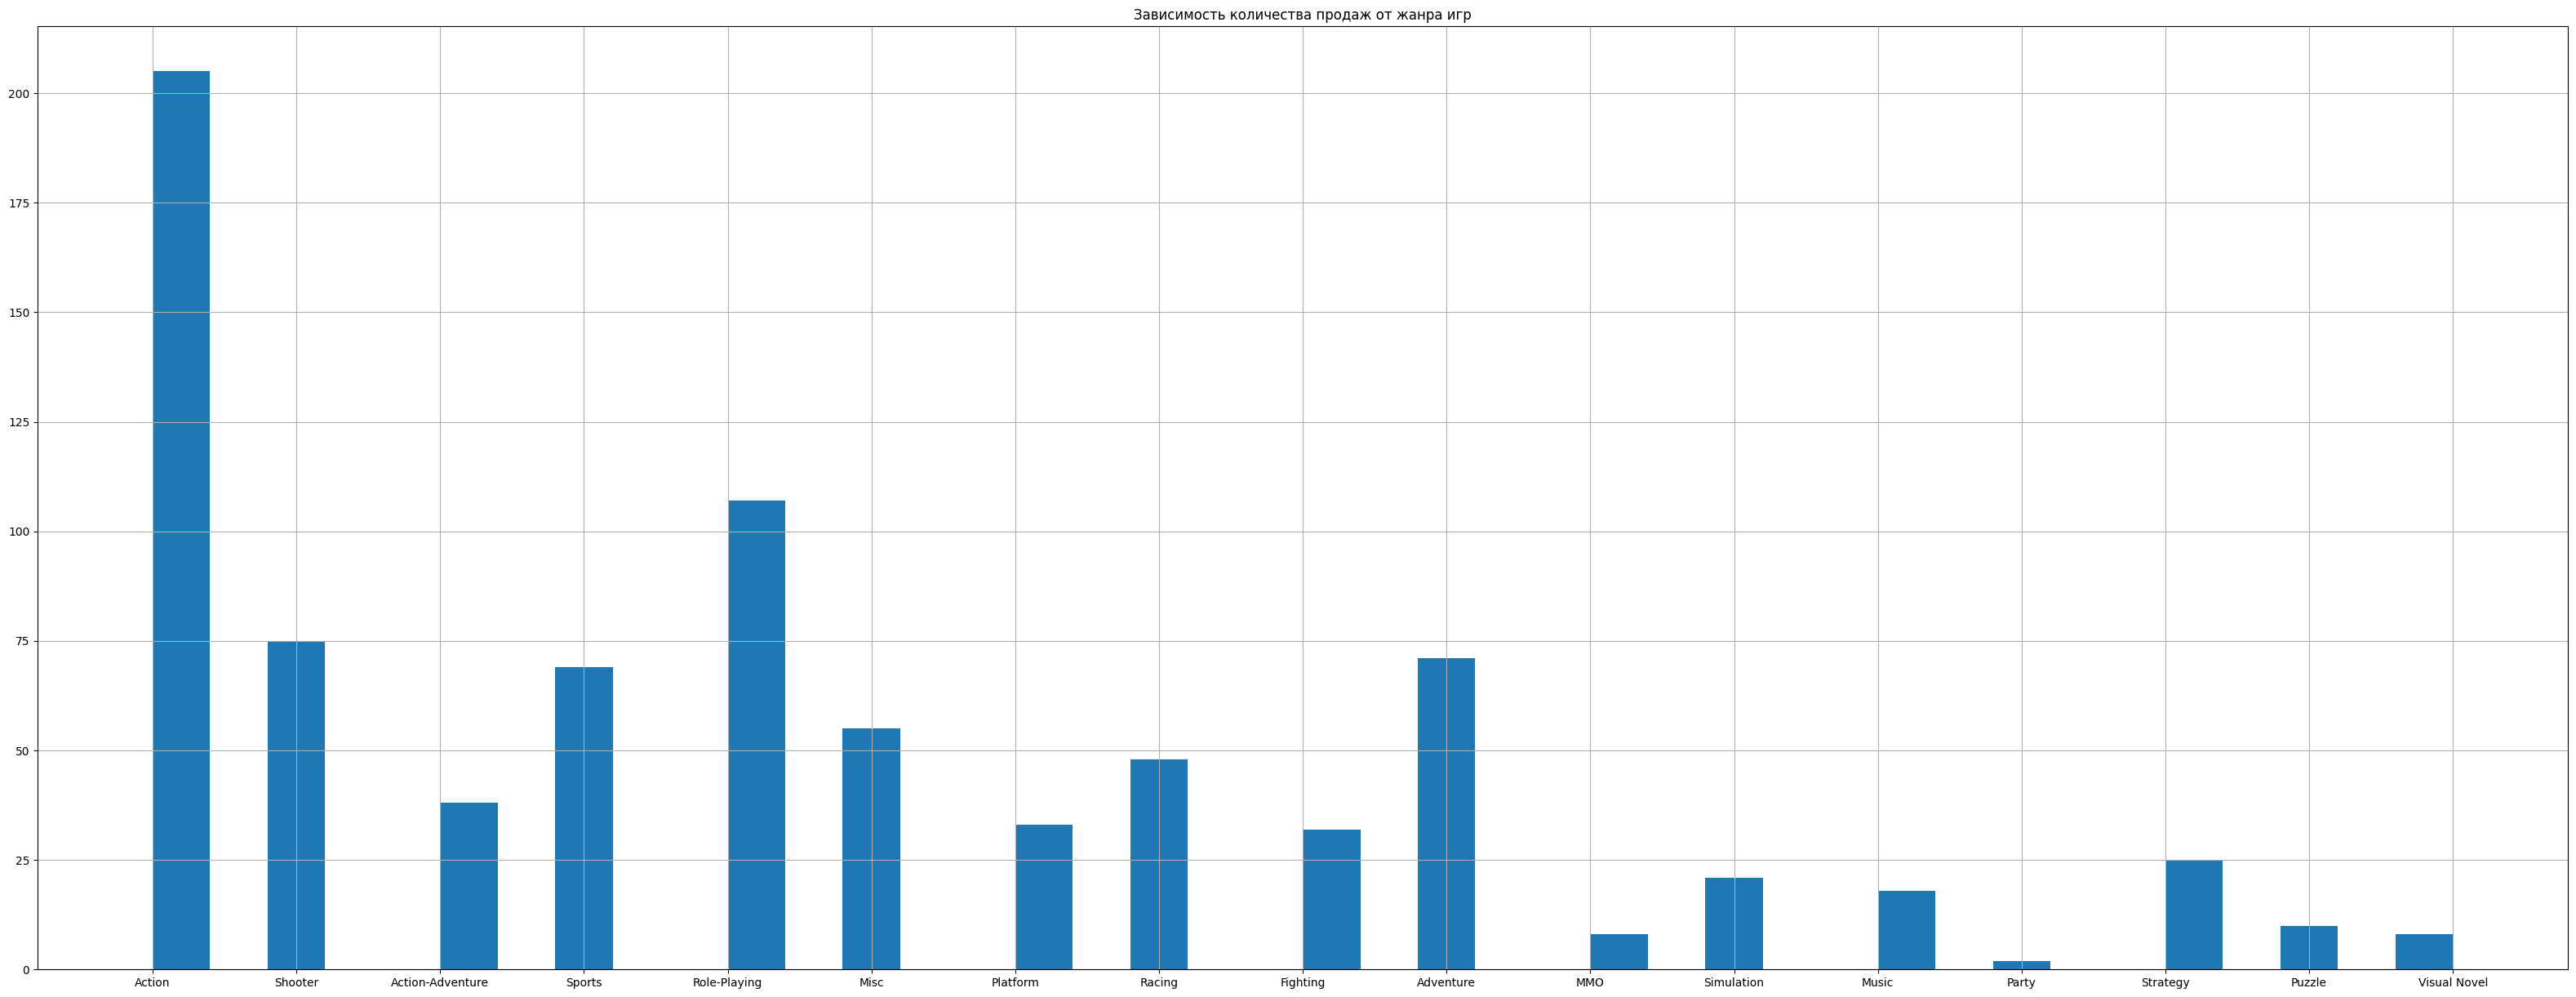

In [14]:
plt.figure(figsize=(40, 15))
df_genres.hist(bins=40)
plt.title('Зависимость количества продаж от жанра игр')

Пирог тут делать, пожалуй, не будем :)

Посмотрим на издателей

In [15]:
df_pub = df_cat_feats['Publisher']
df_pub.value_counts()

Publisher
Namco Bandai Games                56
Sony Interactive Entertainment    47
Ubisoft                           45
Square Enix                       40
Tecmo Koei                        37
                                  ..
Take-Two Interactive               1
CokeM Interactive                  1
Frontier Developments              1
Mojang                             1
Tammeka Games                      1
Name: count, Length: 152, dtype: int64

Гистограмму тут будет тяжело построить

Года выпуска

In [16]:
df_years= df_cat_feats['Year']
df_years.value_counts()

Year
2017.0    254
2016.0    222
2015.0    172
2014.0     98
2018.0     39
2013.0     20
2019.0     12
2020.0      8
Name: count, dtype: int64

Text(0.5, 1.0, 'Зависимость количества продаж от года выпуска игр')

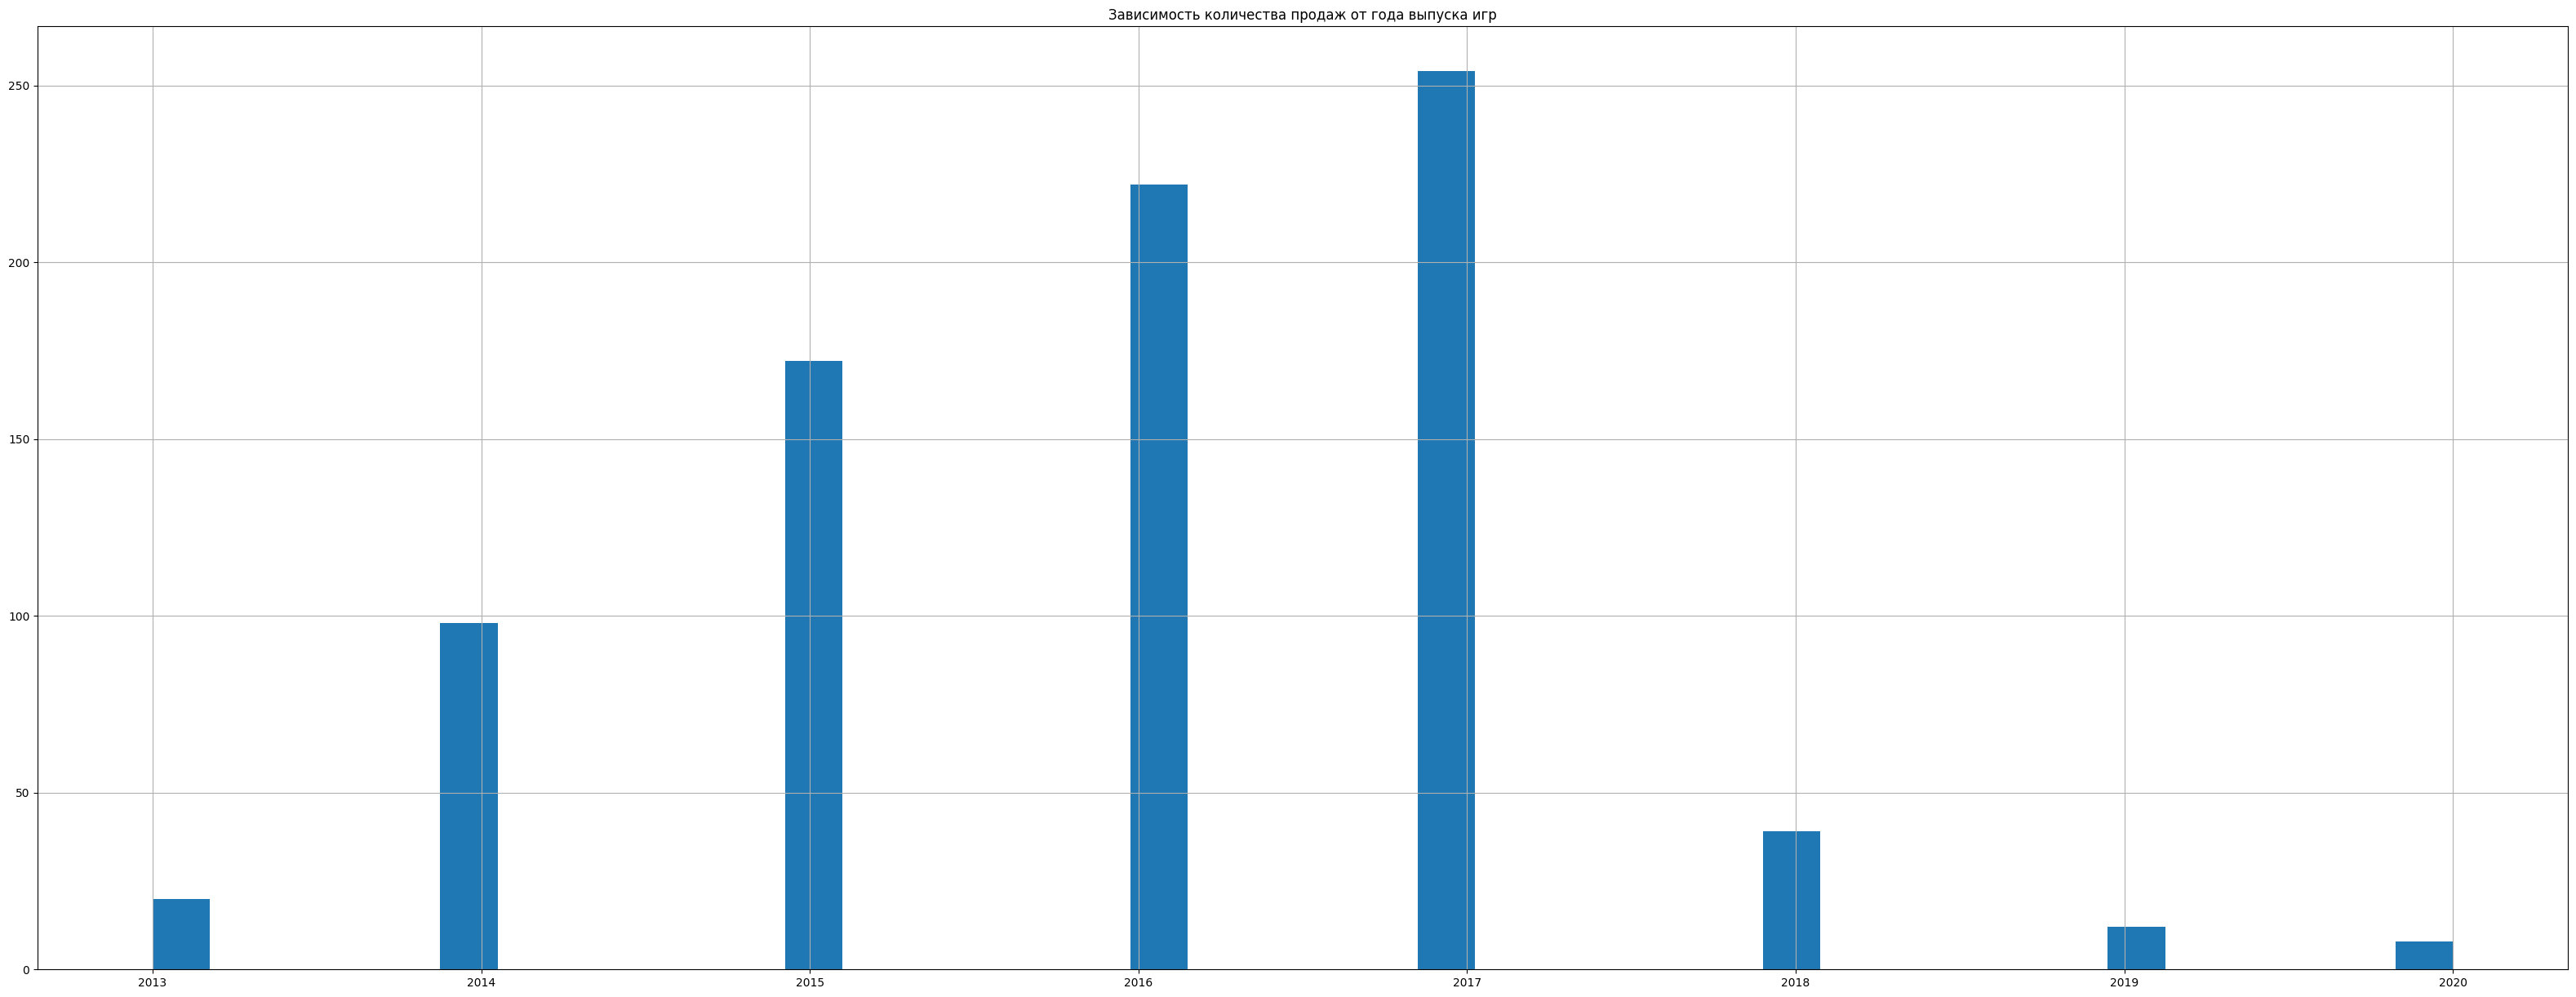

In [17]:
plt.figure(figsize=(40, 15))
df_years.hist(bins=40)
plt.title('Зависимость количества продаж от года выпуска игр')

In [18]:
df_global_pub = df.groupby('Publisher')[['Global']].mean()
df_global_pub = df_global_pub.sort_values(by='Global', ascending=False)
df_global_pub

,Global
Publisher,
Rockstar Games,11.310000
Blizzard Entertainment,3.680000
Warner Bros. Interactive,3.280000
Electronic Arts,2.617143
EA Sports,2.502632
...,...
Endnight Games LtdК,0.000000
Daedalic Entertainment,0.000000
Taleworlds,0.000000


In [19]:
df_global_genre = df.groupby('Genre')[['Global']].mean()
df_global_genre = df_global_genre.sort_values(by='Global', ascending=False)
df_global_genre

,Global
Genre,
Shooter,1.799867
Action-Adventure,1.627895
Sports,1.345652
Action,0.667415
Fighting,0.605000
Role-Playing,0.586262
Platform,0.540909
Racing,0.526875
MMO,0.440000


In [20]:
df_global_year = df.groupby('Year')[['Global']].mean()
df_global_year = df_global_year.sort_values(by='Global', ascending=False)
df_global_year

,Global
Year,
2013.0,1.438000
2018.0,1.287179
2014.0,1.182143
2015.0,0.779012
2016.0,0.611351
2017.0,0.515354
2019.0,0.000000
2020.0,0.000000


Выводы:
<br><br>
1. Довольно странные признаки по продажам в разных странах. Все имеют линнейную прямую корелляцию с таргетом, кроме Японии<br>
2. Год выпуска, Жанр и Издатель - полезные фичи для прогнозирования<br>
3. Очень много нулевых значений. Возможно, выбрана очень плохая нормировка. Плюс, не совсем ясно из начального датафрейма - в какой мере измеряется количество продаж<br>